# Course: Data Science

# Project: Clustering

# Worked By: Rifat Jahan Lia, M1,Iot

In [96]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the penguins_size.csv file and define the penguin species type as an index.

The link of the dataset is here: https://github.com/remijul/dataset/blob/master/penguins_size.csv

In [105]:
#reading the penguins_size.csv file

df = pd.read_csv('/Users/NC/Documents/M1-Semester2/Data Science/Prf. Bahi Jacques/TP/TP4/TUT2/penguins_size.csv')
df.set_index('species', inplace=True)
df

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...
Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE


# 2. Using "sns.pairplot" from seaborn, visualize statistics giving the different characteristics of penguins (culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g) according to their species (see seaborn hue parameter.

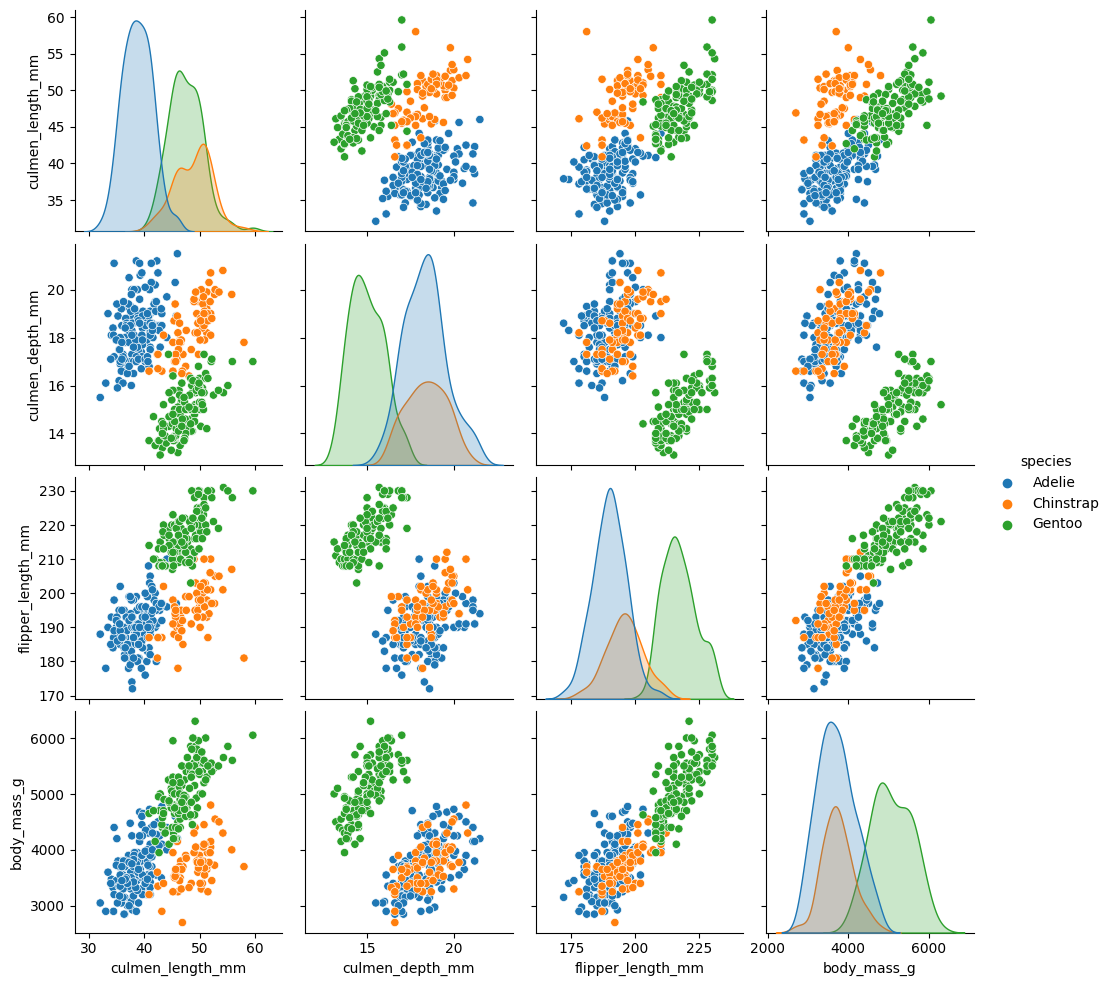

In [107]:
# Visualizing statistics giving the different characteristics of penguins by species using sns.pairplot
df = df.reset_index()
sns.pairplot(data=df, hue="species", vars=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"])

# 3. Give statistics about null values in the dataset

In [109]:
# Getting statistics about null values in the DataFrame
null_values = df.isnull().sum()

null_percentages = null_values / len(df) * 100

# Printing the statistics
print("Number of null values in each column:\n", null_values)
print("\nPercentage of null values in each column:\n", null_percentages)

Number of null values in each column:
 index                 0
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Percentage of null values in each column:
 index                0.000000
species              0.000000
island               0.000000
culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64


# 4. Visualize with a pie chart the proportion of each species in the dataset.

In [119]:
# Counts of each penguin species in the DataFrame
species_counts = df["species"].value_counts()
print("\nSpecies counts:\n\n",species_counts)


Species counts:

 Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


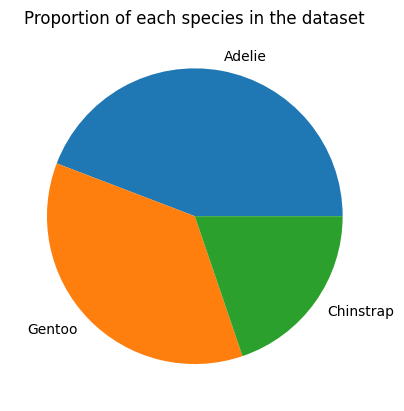

In [113]:
# Visualizing with a pie chart of the species counts
plt.pie(species_counts, labels=species_counts.index)
plt.title("Proportion of each species in the dataset")
plt.show()

# 5. Visualize using a pie chart the proportion (in numbers) of each species in the dataset.

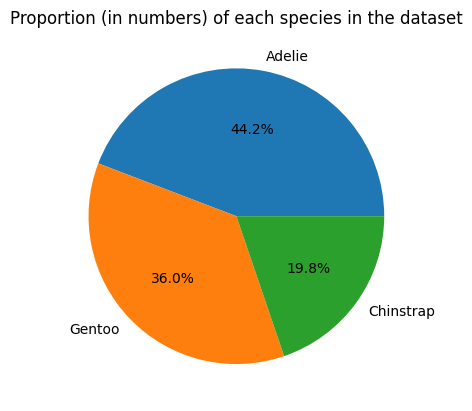

In [114]:
# Visualizing using a pie chart the proportion (in numbers) of each species(in numbers)
plt.pie(species_counts.values, labels=species_counts.index, autopct="%1.1f%%")
plt.title("Proportion (in numbers) of each species in the dataset")
plt.show()

# 6. Visualize using a pie chart the proportion in geographical location of each species in the dataset.

In [123]:
# Counting of each geographical location in the DataFrame
island_counts = df["island"].value_counts()

#Storing each species count by island in a dictionary
species_count_by_island = {}

#Looping through eatch island to count the number of occurrences of each species
for island in island_counts.index:
    island_df =df[df["island"] == island]
    species_counts = island_df["species"].value_counts()
    species_count_by_island[island] = species_counts
    
print("Geographical Location(Island) counts:\n\n", island_counts)
print("\n\nSpecies count by Geographical Location(Island):\n\n", species_count_by_island)


Geographical Location(Island) counts:

 Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64


Species count by Geographical Location(Island):

 {'Biscoe': Gentoo    124
Adelie     44
Name: species, dtype: int64, 'Dream': Chinstrap    68
Adelie       56
Name: species, dtype: int64, 'Torgersen': Adelie    52
Name: species, dtype: int64}


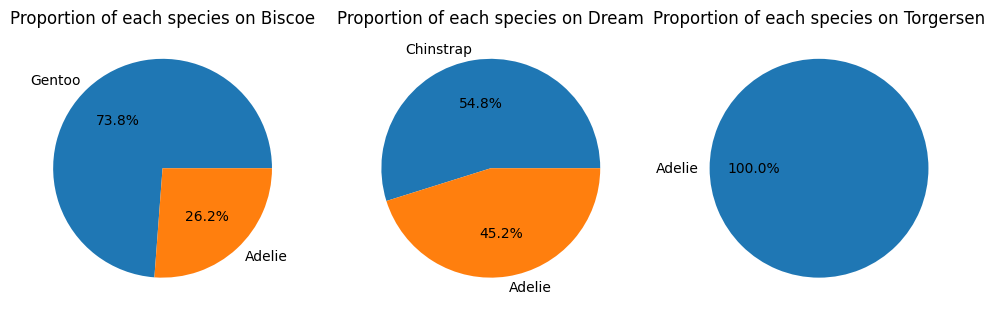

In [124]:
# Visualizing using a pie chart of the species counts by Geographical Location(Island)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, island in enumerate(island_counts.index):
    ax[i].pie(species_counts_by_island[island].values, labels=species_counts_by_island[island].index, autopct="%1.1f%%")
    ax[i].set_title(f"Proportion of each species on {island}")
    
plt.show()

# 7. Visualize with scatter plot the size of the culmen and its depth according to the species.

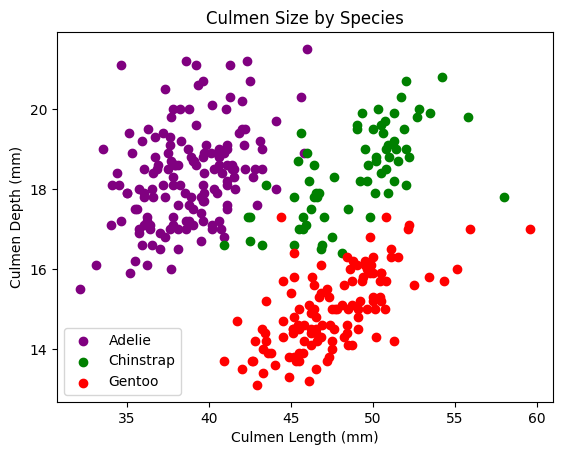

In [127]:
# Creating a dictionary of colors for each species
colors = {
    'Adelie': 'purple',
    'Chinstrap': 'green',
    'Gentoo': 'red'
}

# Creating a scatter plot
fig, ax = plt.subplots()

for species, color in colors.items():
    x = df[df['species'] == species]['culmen_length_mm']
    y = df[df['species'] == species]['culmen_depth_mm']
    ax.scatter(x, y, color=color, label=species)

# Adding labels and legend
ax.set_xlabel('Culmen Length (mm)')
ax.set_ylabel('Culmen Depth (mm)')
ax.set_title('Culmen Size by Species')
ax.legend()

# Displaying
plt.show()

# 8. Visualize in the form of a histogram the length of the fins of all species combined.

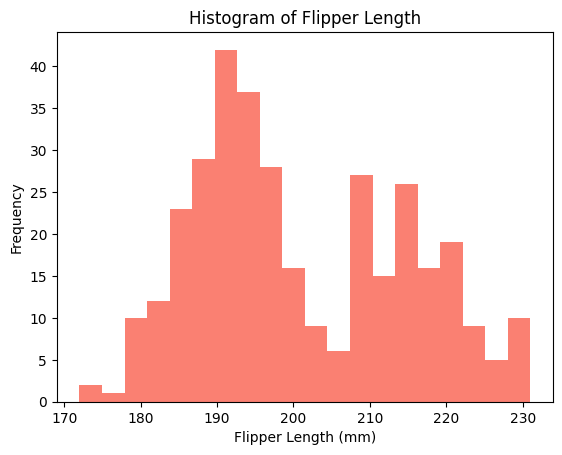

In [133]:
# Extracting the fin length column as a NumPy array
fin_length = df['flipper_length_mm'].values

# Creating a histogram 
fig, ax = plt.subplots()
ax.hist(fin_length, bins=20, color='salmon')

# Adding labels and title
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Flipper Length')

# Displaying
plt.show()

# 9. Visualize in histogram form the length of the fins according to the species.

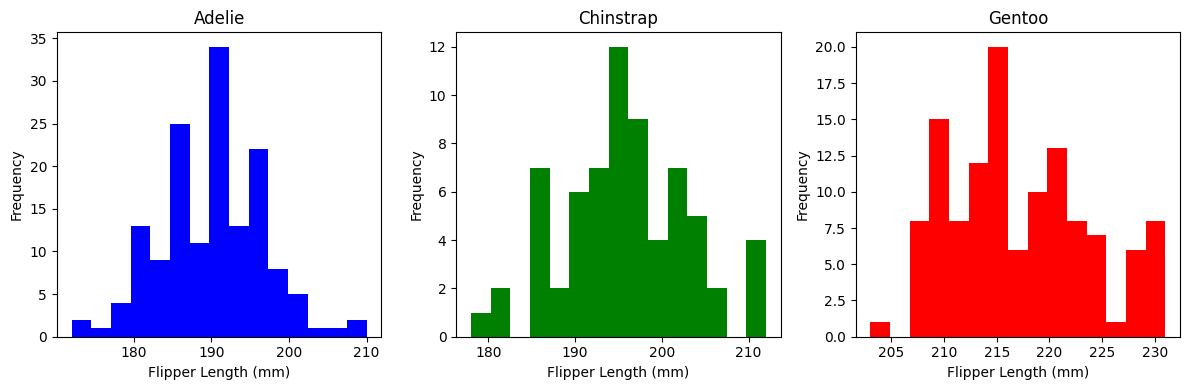

In [134]:
# Creating a dictionary of colors for each species
colors = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'red'
}

#Subplot for each species
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Looping over each species and plotting a histogram form the length of the fins 
for i, species in enumerate(colors.keys()):
    species_df = df[df['species'] == species]
    ax = axs[i]
    ax.hist(species_df['flipper_length_mm'], bins=15, color=colors[species])
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Frequency')
    ax.set_title(species)

# Adjusting spacing 
fig.tight_layout()
#Displaying
plt.show()

# 10. Visualize fin lengths according to species using violin points (learn about Seaborn'sviolinplot).
Using the heatmap function and the data.corr() function, visualize the correlation
between the different variables:
culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g

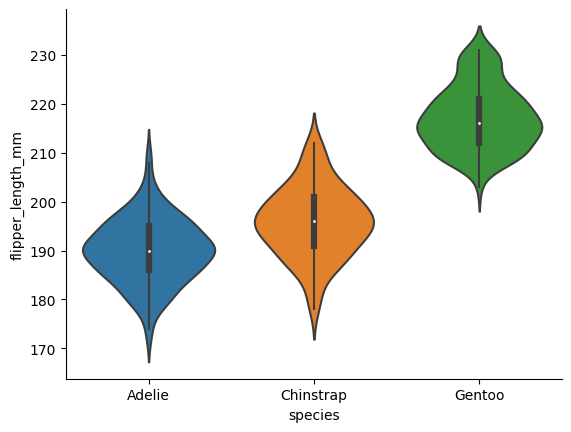

In [135]:
# Visualizing fin lengths according to species using violin points
sns.violinplot(x='species', y='flipper_length_mm', data=df)
sns.despine()
plt.show()

C:\Users\NC\AppData\Local\Temp\ipykernel_6364\263417591.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


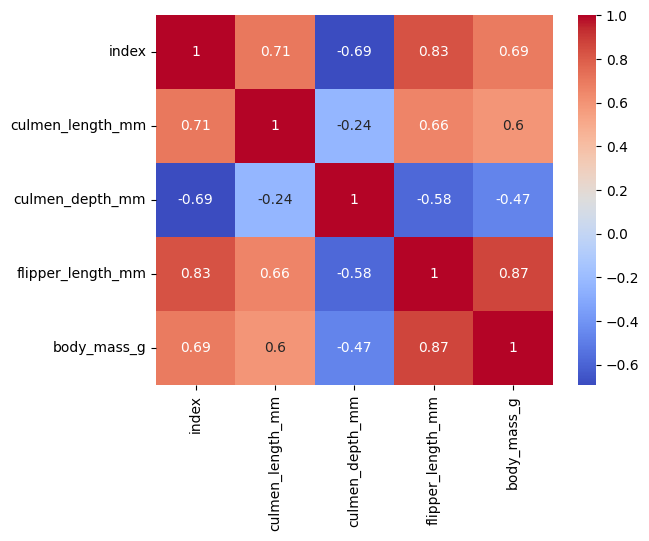

In [136]:
#Using the heatmap function and the data.corr() function, visualize the correlation between the different variables: culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()